In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from glob import glob
from os import path
from collections import defaultdict, namedtuple
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
from matplotlib.animation import FuncAnimation
plt.style.use('notebook')

import mplcursors

import time

import sys
sys.path.insert(0, path.abspath(path.join(path.curdir, '../src')))

from mythicwind.csv_io import read_frame, read_frames_parallel
from mythicwind.ellipse import *
from mythicwind.report import *
from mythicwind.gps import *

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
helihoist_raw = read_frames_parallel('../data/turbines/turbine-08/helihoist-1/tom/clean/')
helihoist_raw = pd.concat(helihoist_raw)

In [5]:
sbitroot_raw = read_frames_parallel('../data/turbines/turbine-08/sbitroot/tom/clean/')
sbitroot_raw = pd.concat(sbitroot_raw)

In [6]:
sbittip_raw = read_frames_parallel('../data/turbines/turbine-08/sbittip/tom/clean/')
sbittip_raw = pd.concat(sbittip_raw)

In [7]:
sbitroot_gps = read_frame('../data/turbines/turbine-08/sbitroot/tom/gps/turbine-08_sbitroot_tom_gps.csv')

<IPython.core.display.Javascript object>


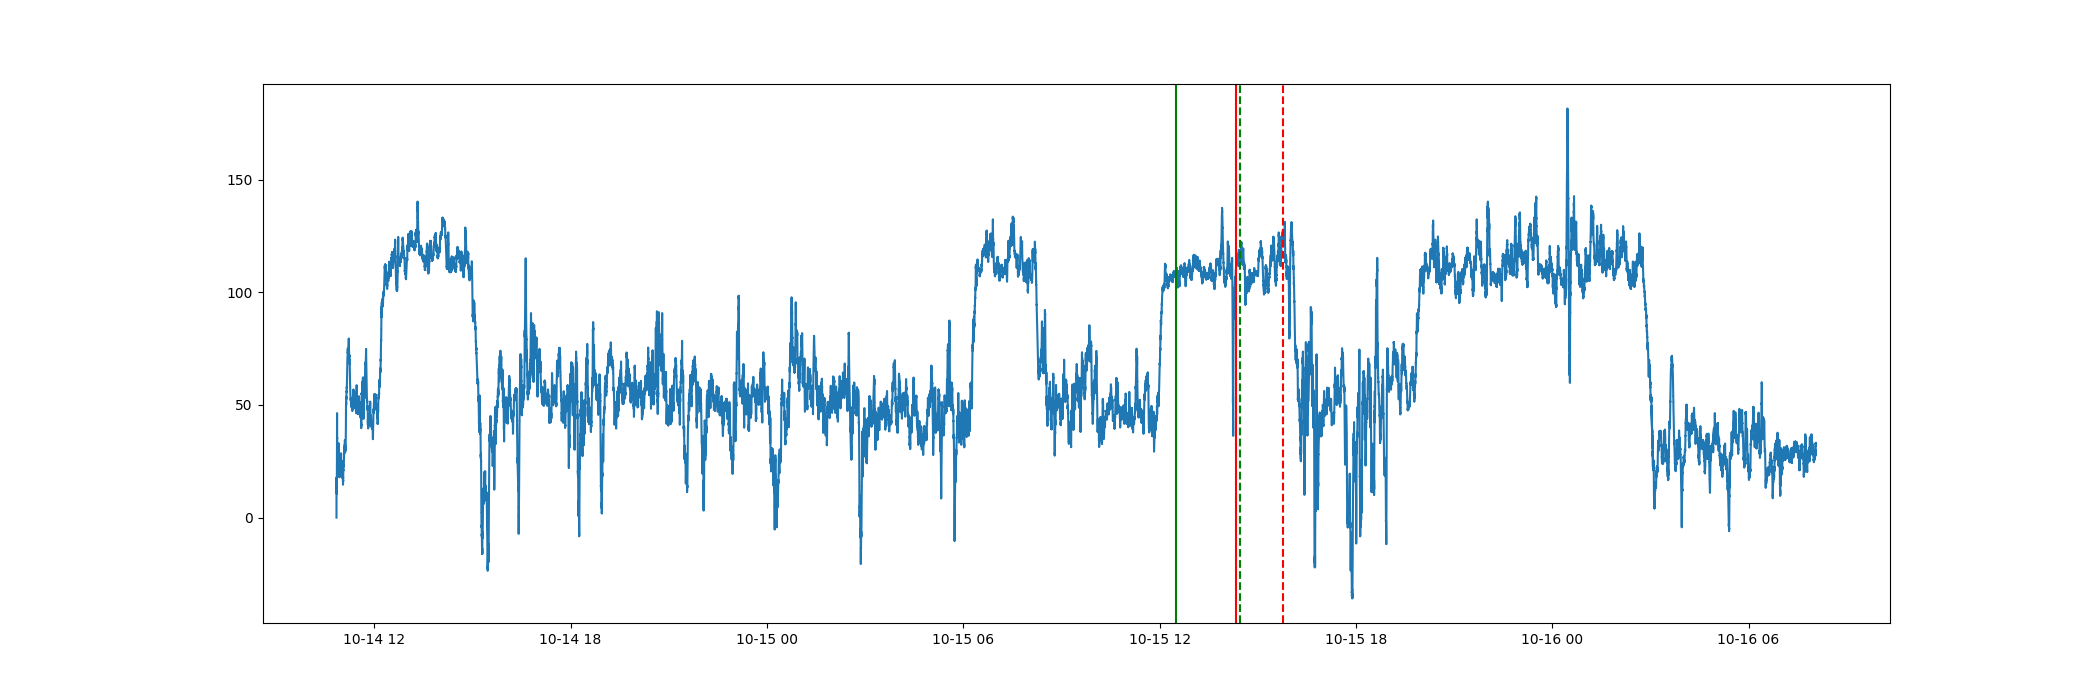

In [8]:
start = pd.to_datetime('2019-10-15 12:30+00:00')
end = pd.to_datetime('2019-10-15 14:20+00:00')

# 1571149691.082	1571154420.94867

start_bl = pd.to_datetime(1571149691, unit='s', utc=True)
end_bl = pd.to_datetime(1571154420, unit='s', utc=True)


plt.figure()
plt.plot(sbitroot_gps.altitude)
plt.axvline(x=start, color='g', label='start')
plt.axvline(x=end, color='r', label='end')
plt.axvline(x=start_bl, color='g', ls='--', label='blade landing')
plt.axvline(x=end_bl, color='r', ls='--', label='blade disconnected')

<IPython.core.display.Javascript object>


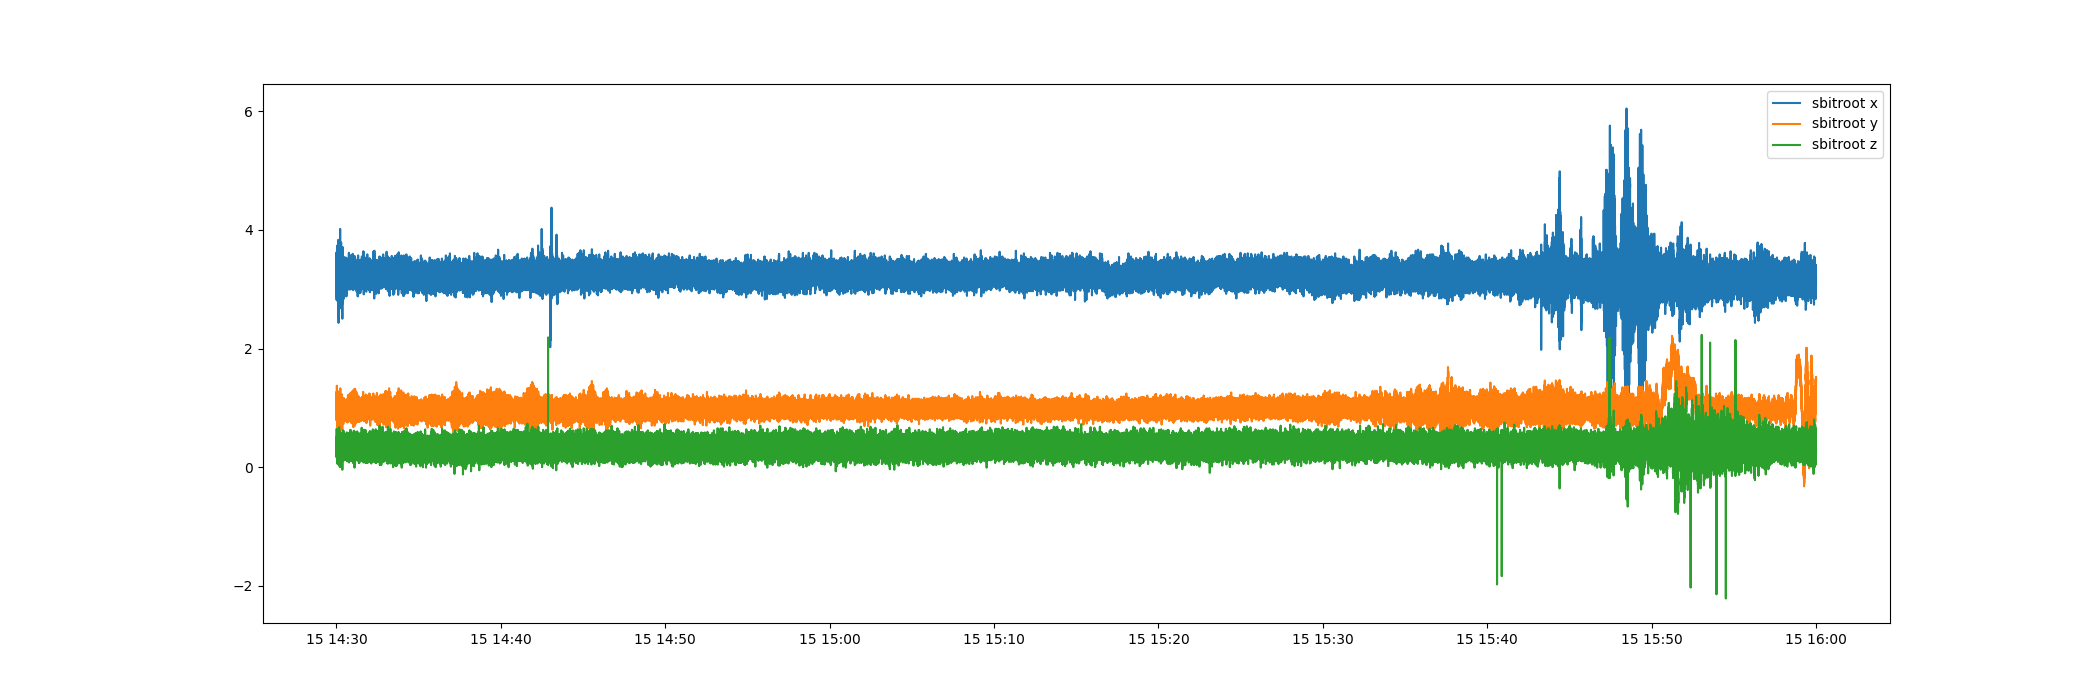

In [77]:
plt.figure()

#plt.plot(helihoist_raw.rot_y[start:end] - helihoist_raw.rot_y[start:end].mean() , label='helihoist x')
plt.plot(sbitroot_raw.rot_x[start:end], label='sbitroot x')
plt.plot(sbitroot_raw.rot_y[start:end], label='sbitroot y')
plt.plot(sbitroot_raw.rot_z[start:end], label='sbitroot z')
plt.legend()

## before blade landing
### acceleration FFT SBITRoot

<IPython.core.display.Javascript object>


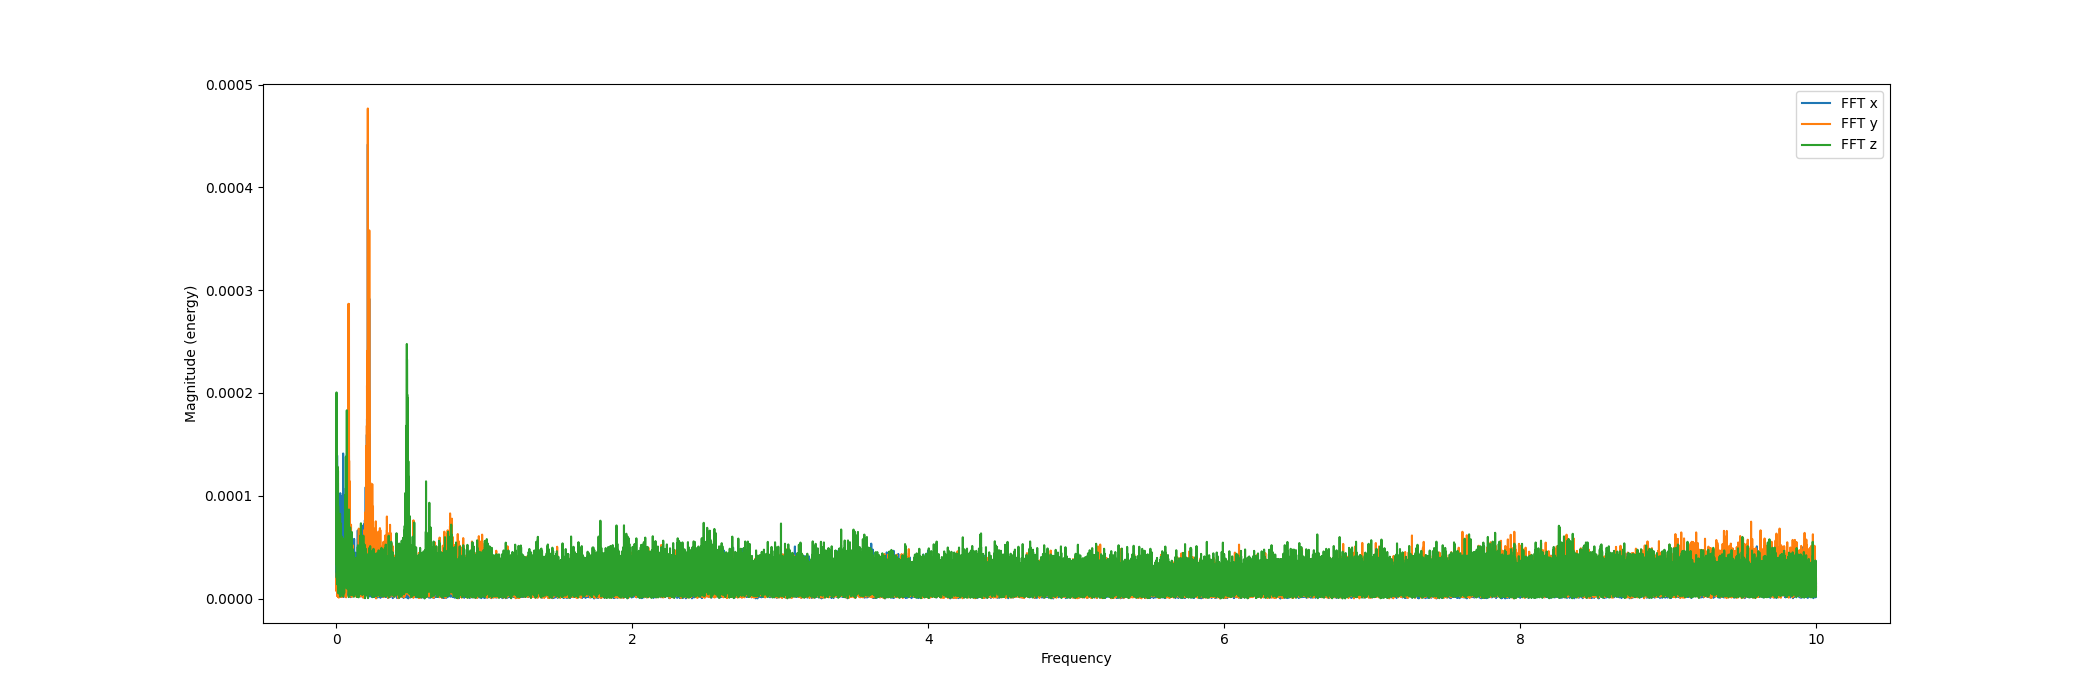

In [9]:
Fs=20
plt.figure()
plt.magnitude_spectrum(sbitroot_raw.acc_x[start:end].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT x')
plt.magnitude_spectrum(sbitroot_raw.acc_y[start:end].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT y')
plt.magnitude_spectrum(sbitroot_raw.acc_z[start:end].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT z')
plt.legend()

### Angular Velocity FFT SBITRoot

<IPython.core.display.Javascript object>


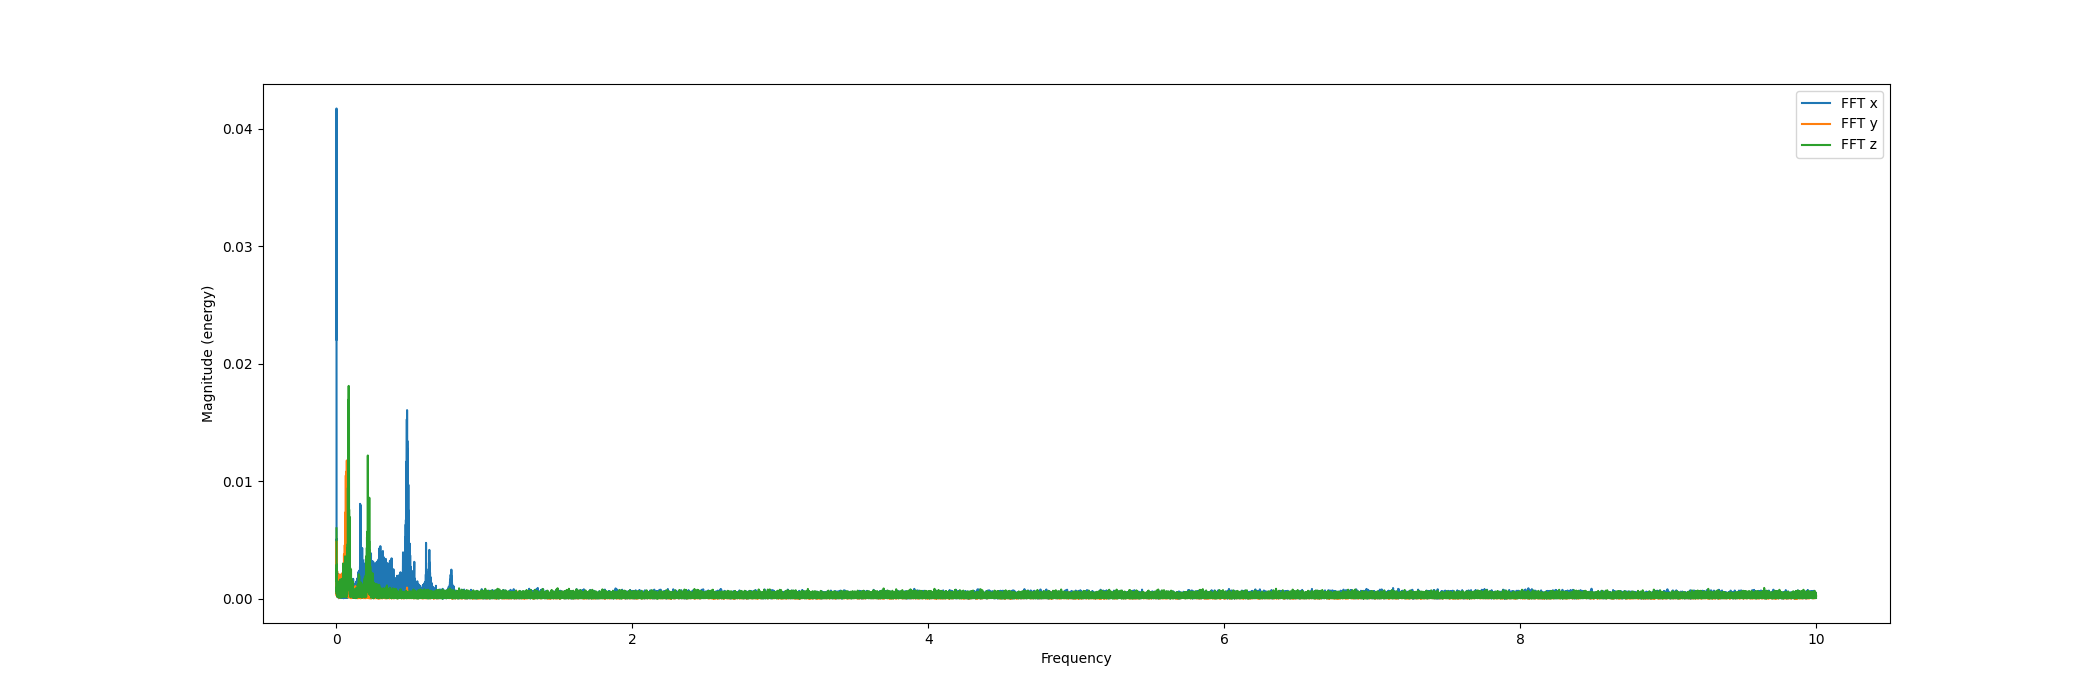

In [18]:
Fs=20
plt.figure()
plt.magnitude_spectrum(sbitroot_raw.rot_x[start:end].resample('50ms').mean().fillna(method='ffill') - sbitroot_raw.rot_x[start:end].mean(), Fs=Fs, label='FFT x')
plt.magnitude_spectrum(sbitroot_raw.rot_y[start:end].resample('50ms').mean().fillna(method='ffill') - sbitroot_raw.rot_y[start:end].mean(), Fs=Fs, label='FFT y')
plt.magnitude_spectrum(sbitroot_raw.rot_z[start:end].resample('50ms').mean().fillna(method='ffill') - sbitroot_raw.rot_z[start:end].mean(), Fs=Fs, label='FFT z')
plt.legend()

### Acceleration FFT SBITTip

<IPython.core.display.Javascript object>


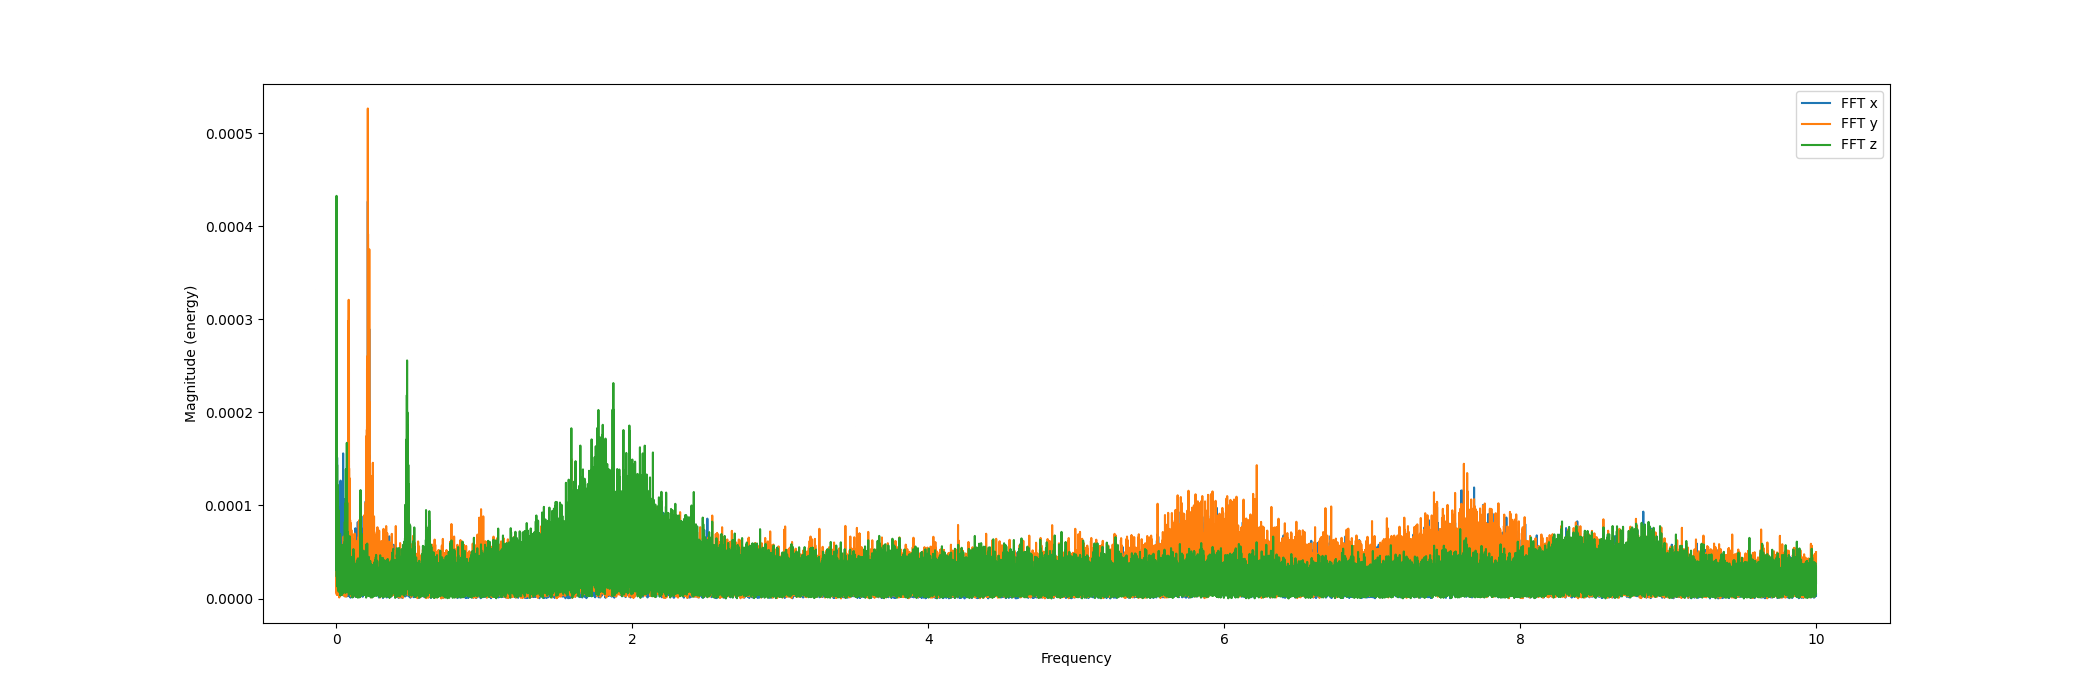

In [10]:
Fs=20
plt.figure()
plt.magnitude_spectrum(sbittip_raw.acc_x[start:end].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT x')
plt.magnitude_spectrum(sbittip_raw.acc_y[start:end].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT y')
plt.magnitude_spectrum(sbittip_raw.acc_z[start:end].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT z')
plt.legend()

### Angular Velocity FFT SBITTip

<IPython.core.display.Javascript object>


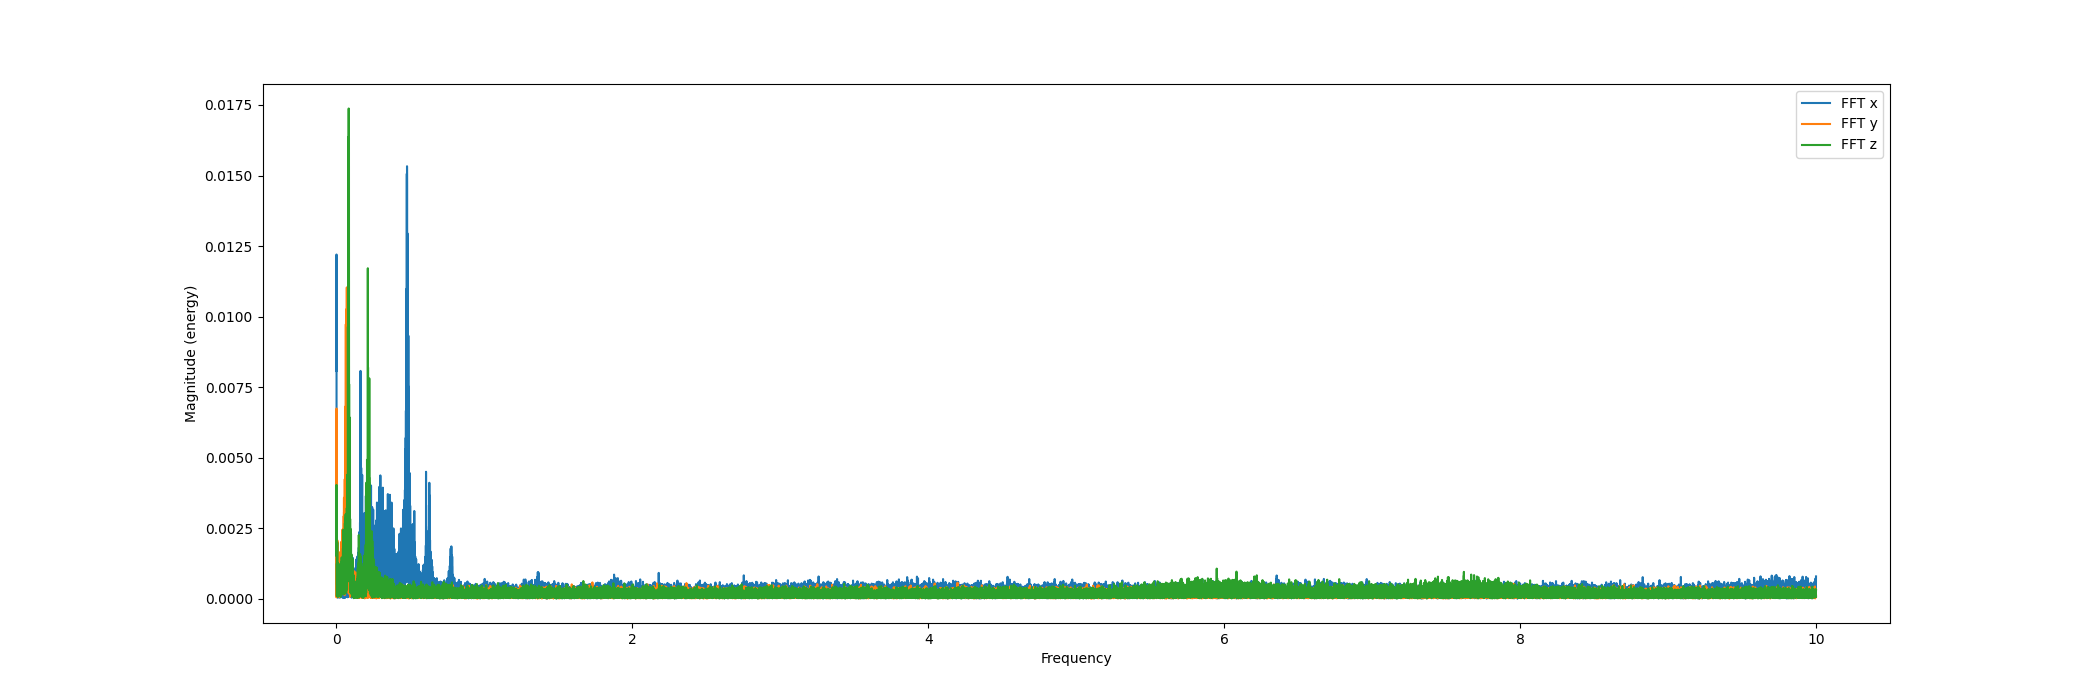

In [17]:
Fs=20
plt.figure()
plt.magnitude_spectrum(sbittip_raw.rot_x[start:end].resample('50ms').mean().fillna(method='ffill') - sbittip_raw.rot_x[start:end].mean(), Fs=Fs, label='FFT x')
plt.magnitude_spectrum(sbittip_raw.rot_y[start:end].resample('50ms').mean().fillna(method='ffill') - sbittip_raw.rot_y[start:end].mean(), Fs=Fs, label='FFT y')
plt.magnitude_spectrum(sbittip_raw.rot_z[start:end].resample('50ms').mean().fillna(method='ffill') - sbittip_raw.rot_z[start:end].mean(), Fs=Fs, label='FFT z')
plt.legend()

### Acceleration FFT Helihoist

<IPython.core.display.Javascript object>


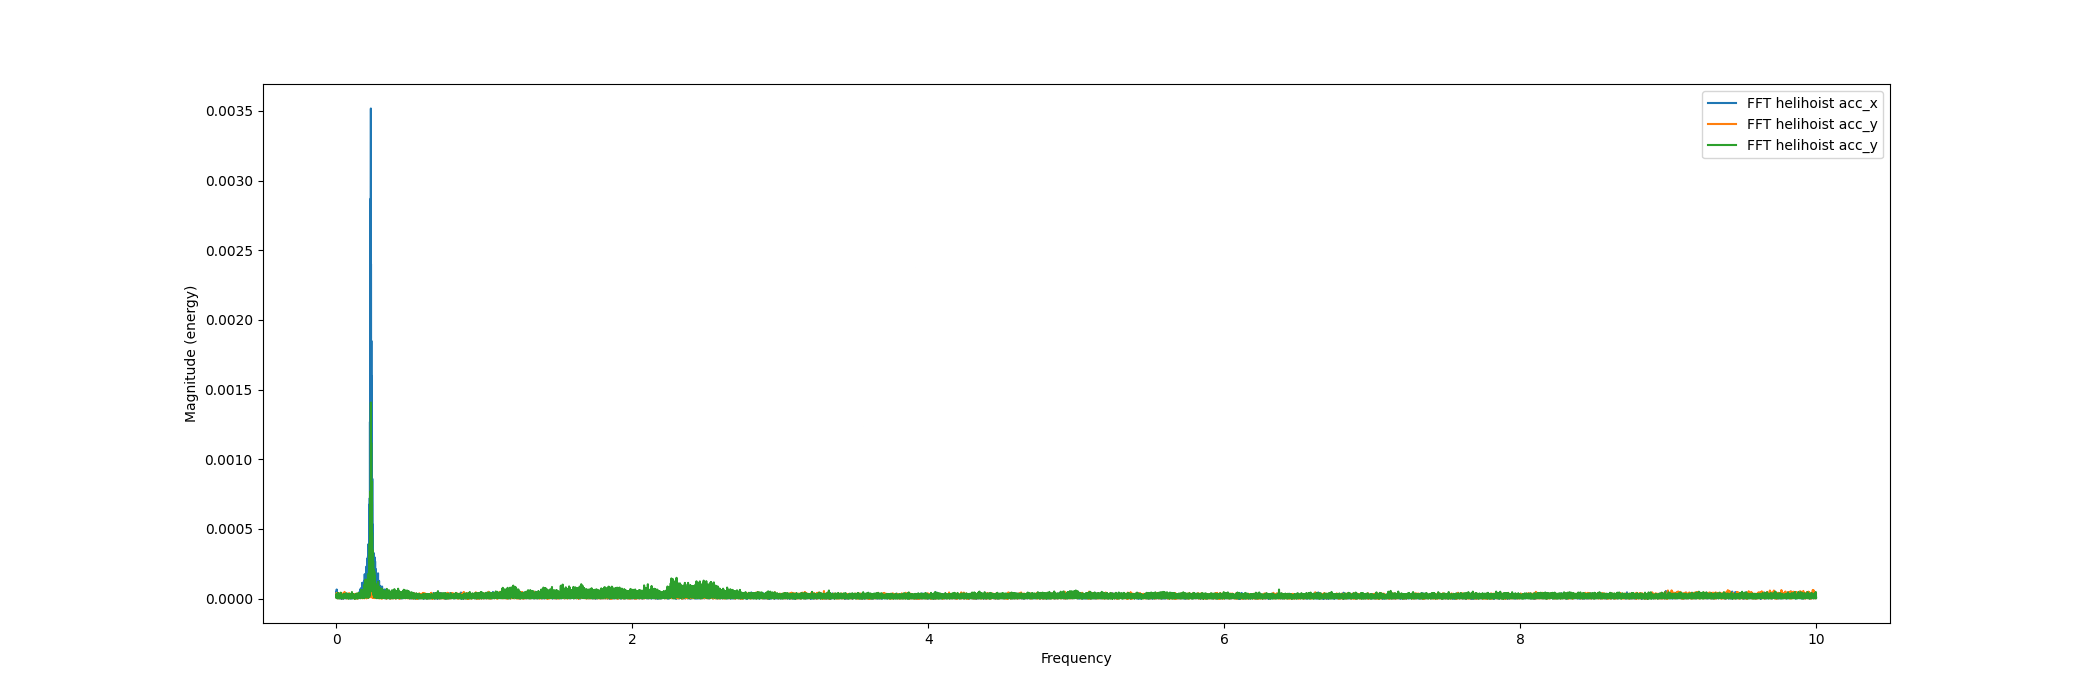

In [11]:
Fs=20
plt.figure()
plt.magnitude_spectrum(helihoist_raw.acc_x[start:end].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT helihoist acc_x')
plt.magnitude_spectrum(helihoist_raw.acc_y[start:end].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT helihoist acc_y')
plt.magnitude_spectrum(helihoist_raw.acc_z[start:end].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT helihoist acc_y')
plt.legend()

## After blade landing
### Acceleration FFT SBITRoot

<IPython.core.display.Javascript object>


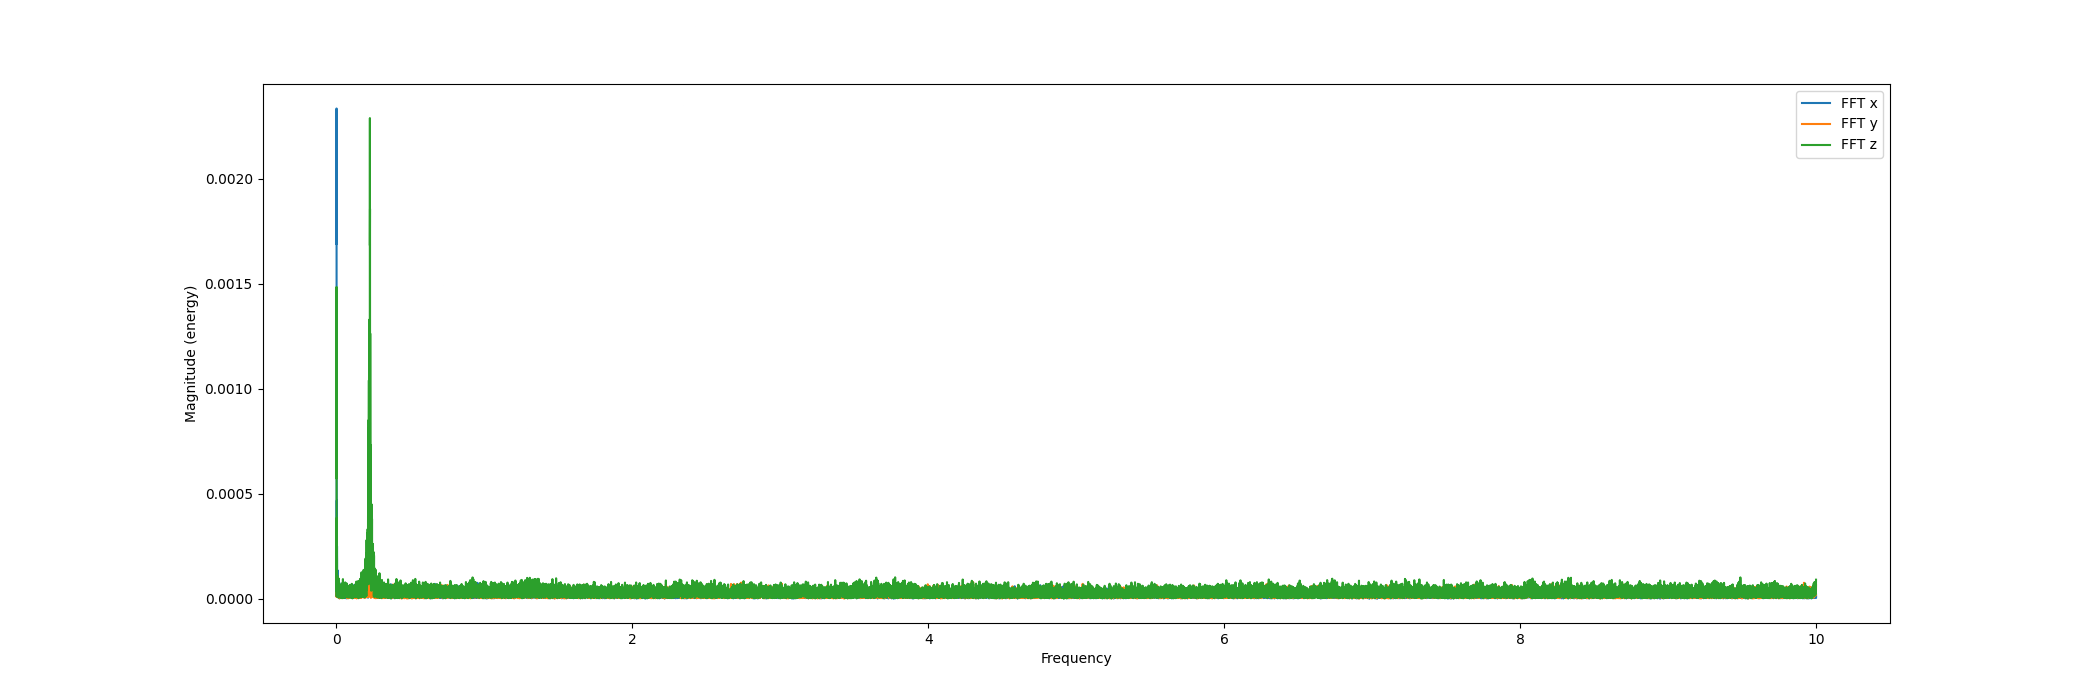

In [13]:
Fs=20
plt.figure()
plt.magnitude_spectrum(sbitroot_raw.acc_x[start_bl:end_bl].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT x')
plt.magnitude_spectrum(sbitroot_raw.acc_y[start_bl:end_bl].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT y')
plt.magnitude_spectrum(sbitroot_raw.acc_z[start_bl:end_bl].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT z')
plt.legend()

### Acceleration FFT SBITTip

<IPython.core.display.Javascript object>


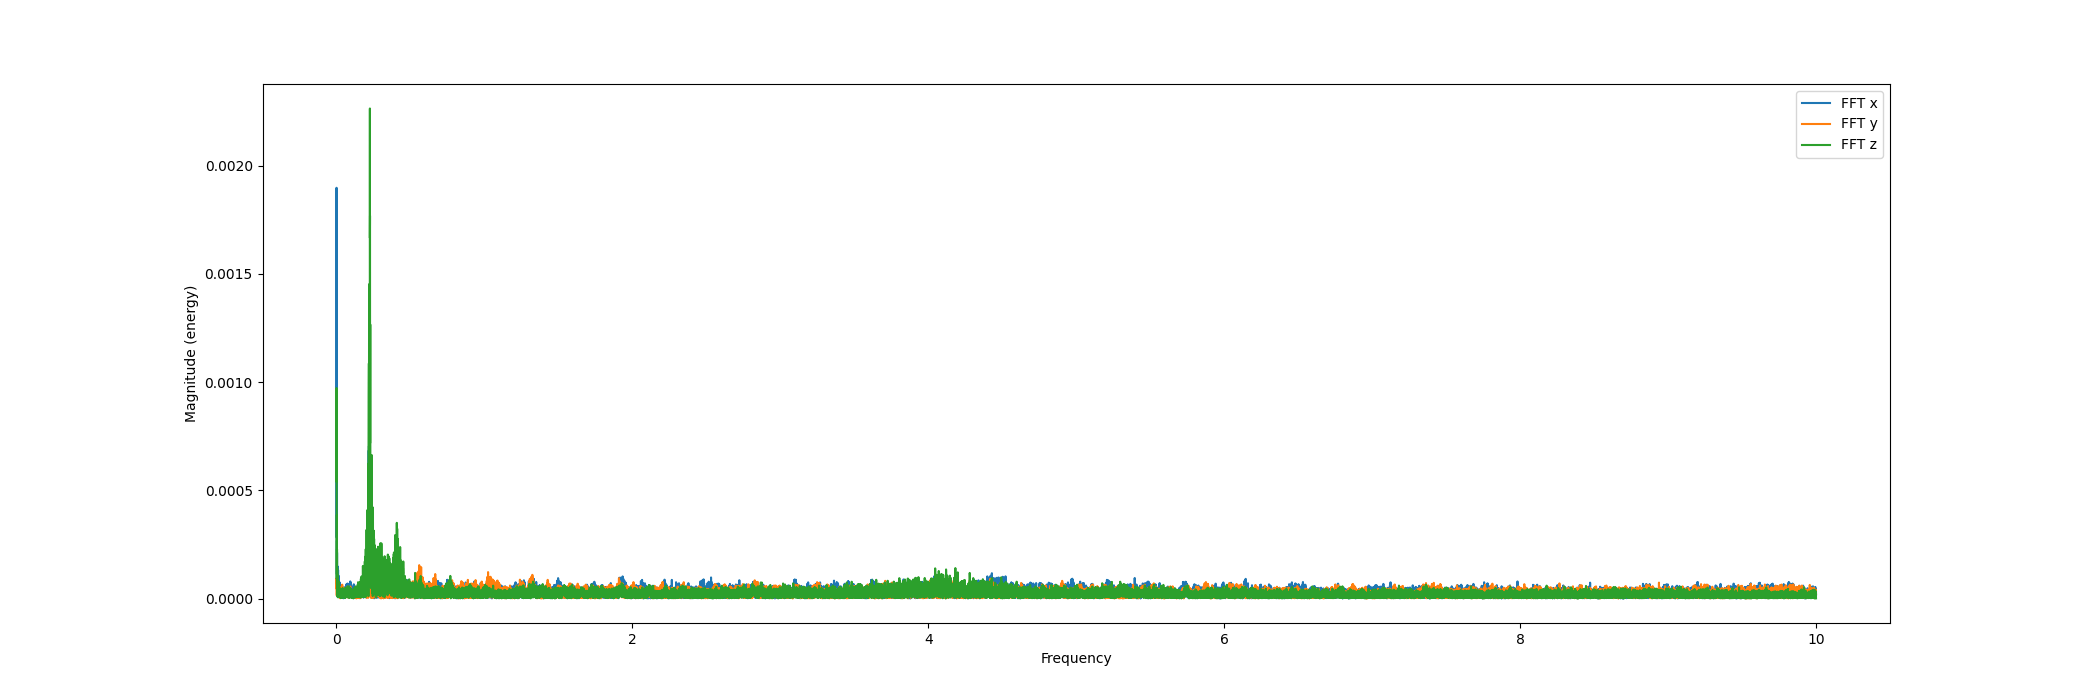

In [14]:
Fs=20
plt.figure()
plt.magnitude_spectrum(sbittip_raw.acc_x[start_bl:end_bl].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT x')
plt.magnitude_spectrum(sbittip_raw.acc_y[start_bl:end_bl].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT y')
plt.magnitude_spectrum(sbittip_raw.acc_z[start_bl:end_bl].resample('50ms').mean().fillna(method='ffill'), Fs=Fs, label='FFT z')
plt.legend()

### Rotation FFT SBITTip

<IPython.core.display.Javascript object>


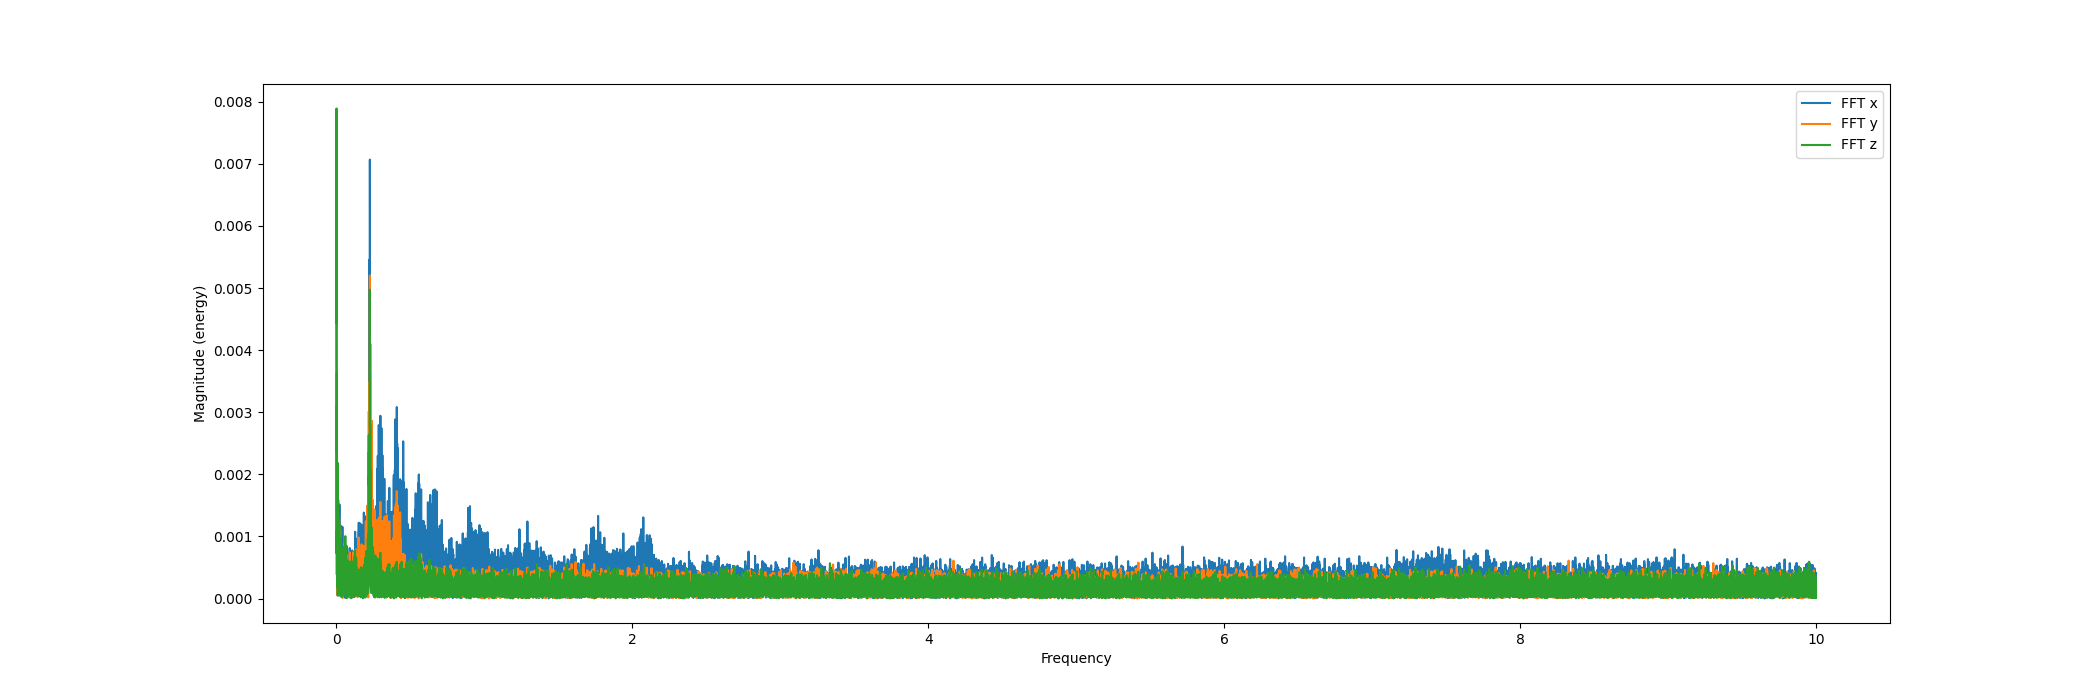

In [16]:
Fs=20
plt.figure()
plt.magnitude_spectrum(sbittip_raw.rot_x[start_bl:end_bl].resample('50ms').mean().fillna(method='ffill') - sbittip_raw.rot_x[start_bl:end_bl].mean(), Fs=Fs, label='FFT x')
plt.magnitude_spectrum(sbittip_raw.rot_y[start_bl:end_bl].resample('50ms').mean().fillna(method='ffill') - sbittip_raw.rot_y[start_bl:end_bl].mean(), Fs=Fs, label='FFT y')
plt.magnitude_spectrum(sbittip_raw.rot_z[start_bl:end_bl].resample('50ms').mean().fillna(method='ffill') - sbittip_raw.rot_z[start_bl:end_bl].mean(), Fs=Fs, label='FFT z')
plt.legend()